# Import the libraries

In [1]:
import os
import sys
sys.path.append("../")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
data = pd.read_csv('../data/processed/data_ultimate_clean.csv')

In [3]:
data['drinker'].value_counts()

drinker
0    26198
1    20739
Name: count, dtype: int64

In [4]:
# undersampling the data
from scripts.manipulation.undersampling import undersample

data_balanced = undersample(data, 'drinker')

In [5]:
data_balanced.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'glucose_fasting', 'total_cholesterol',
       'HDL', 'LDL', 'triglyceride', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'AST', 'ALT', 'GGT', 'drinker', 'never_smoked',
       'ex_smoker', 'current_smoker'],
      dtype='object')

In [6]:
# drop unnecessary columns
data_balanced.drop(columns=['sight_left',
       'sight_right', 'hear_left', 'hear_right','urine_protein'], axis=1, inplace=True)

In [7]:
data_balanced['drinker'].value_counts()

drinker
0    20739
1    20739
Name: count, dtype: int64

In [8]:
X = data_balanced.drop(['drinker'], axis=1)
y= data_balanced['drinker']

Accuracy score:  0.6700819672131147
Confusion matrix:  [[2825 1362]
 [1375 2734]]
Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67      4187
           1       0.67      0.67      0.67      4109

    accuracy                           0.67      8296
   macro avg       0.67      0.67      0.67      8296
weighted avg       0.67      0.67      0.67      8296



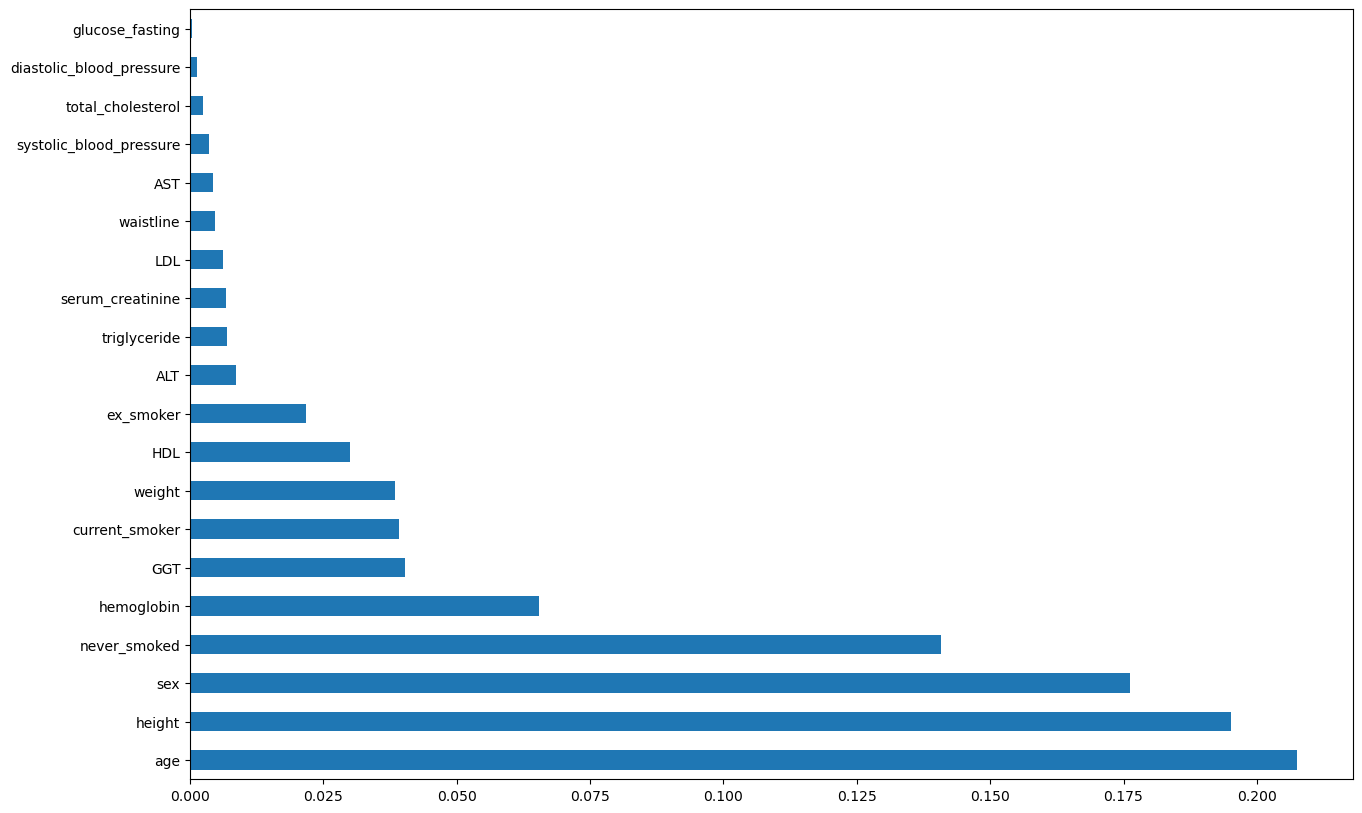

In [19]:
# train a random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=1000, random_state=42, criterion='gini', max_depth=4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

# plot feature importance
plt.figure(figsize=(15, 10))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

